In [1]:
import mlflow




In [2]:
# tracking URI
from pathlib import Path

In [3]:
mlflow_path = Path().resolve().parent / "mlflow.db"
mlflow.set_tracking_uri(f"sqlite:///{mlflow_path}")

print(mlflow_path)
print(f"sqlite:///{mlflow_path}")

/home/marcos/Escritorio/AI-prod/QM9-ML/mlflow.db
sqlite:////home/marcos/Escritorio/AI-prod/QM9-ML/mlflow.db


In [4]:
#client = mlflow.tracking.MlflowClient()

In [5]:
EXPERIMENT_NAME = "qm9"

df = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME]) 

2025/12/02 16:26:57 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/02 16:26:57 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


In [6]:
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.val_ev,metrics.val_mse,metrics.val_mae,metrics.val_rmse,...,params.lr,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.git.commit,tags.tuning_run_id,tags.dataset,tags.data_version,tags.model_type
0,336b9fcac6a144ae88006d286e5439c3,1,FINISHED,/home/marcos/Escritorio/AI-prod/QM9-ML/mlruns/...,2025-12-02 19:26:21.857000+00:00,2025-12-02 19:26:21.979000+00:00,-0.261064,0.871730,0.754940,0.933665,...,None,/home/marcos/Escritorio/AI-prod/QM9-ML/scripts...,LOCAL,marcos,test_evaluation,b4af9dec94420c08dd86b131b44cbe69915345ae,417c54e0be4f4b1f813036d6194144b2,test,v1,None
1,417c54e0be4f4b1f813036d6194144b2,1,FINISHED,/home/marcos/Escritorio/AI-prod/QM9-ML/mlruns/...,2025-12-02 19:24:46.947000+00:00,2025-12-02 19:24:52.627000+00:00,0.043945,2.109445,1.012328,1.452393,...,0.00513198599298556,/home/marcos/Escritorio/AI-prod/QM9-ML/scripts...,LOCAL,marcos,tuning,b4af9dec94420c08dd86b131b44cbe69915345ae,None,None,v1,schnet


In [8]:
import mlflow

client = mlflow.tracking.MlflowClient()
run_id = "417c54e0be4f4b1f813036d6194144b2"

# list artifacts
artifacts = client.list_artifacts(run_id)
for a in artifacts:
    print(a.path)



#local_path = client.download_artifacts(run_id, artifacts[0].path)

#with open(local_path) as f:
#    data = json.load(f)

loss_curve.png
optuna_trials_e8839c8031864f0c910e8aa6ddd9c43a.json


In [9]:

#download_artifacts(run_id, artifact_path) returns the local file path.

import mlflow
import json
from PIL import Image

client = mlflow.tracking.MlflowClient()
run_id = "417c54e0be4f4b1f813036d6194144b2"

# ---- Download JSON ----
json_path = client.download_artifacts(
    run_id, 
    "optuna_trials_e8839c8031864f0c910e8aa6ddd9c43a.json"
)
with open(json_path, "r") as f:
    trials_data = json.load(f)

print("JSON loaded:")
print(trials_data)



JSON loaded:
[{'batch_size': 32, 'lr': 0.001608059, 'hidden_channels': 64, 'num_filters': 32, 'num_interactions': 0, 'metrics': {'mse': 2.4797639847, 'rmse': 1.5747265816, 'mae': 1.3336764574, 'r2': -0.2181125879, 'ev': 0.1166501641}, 'value': 2.4797640324, 'number': 0}, {'batch_size': 32, 'lr': 0.0001382346, 'hidden_channels': 64, 'num_filters': 32, 'num_interactions': 0, 'metrics': {'mse': 7.1044135094, 'rmse': 2.6654105186, 'mae': 2.0159313679, 'r2': -2.4898386002, 'ev': -2.2347075939}, 'value': 7.1044139862, 'number': 1}, {'batch_size': 16, 'lr': 0.005131986, 'hidden_channels': 32, 'num_filters': 32, 'num_interactions': 0, 'metrics': {'mse': 2.0614492893, 'rmse': 1.4357748032, 'mae': 1.1665966511, 'r2': -0.0126276016, 'ev': 0.1494117975}, 'value': 2.061449337, 'number': 2}]


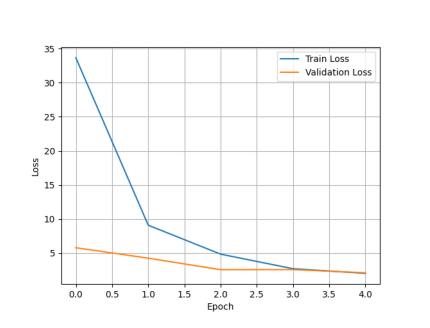

In [12]:
import matplotlib.pyplot as plt


# Download image
img_path = client.download_artifacts(run_id, "loss_curve.png")

# Show inline
img = Image.open(img_path)

plt.figure(figsize=(6,4))
plt.imshow(img)
plt.axis("off")
plt.show()

In [13]:
"""
# ---- Download image ----
img_path = client.download_artifacts(run_id, "loss_curve.png")
img = Image.open(img_path)
img.show()
"""

'\n# ---- Download image ----\nimg_path = client.download_artifacts(run_id, "loss_curve.png")\nimg = Image.open(img_path)\nimg.show()\n'

In [14]:
trials_data

[{'batch_size': 32,
  'lr': 0.001608059,
  'hidden_channels': 64,
  'num_filters': 32,
  'num_interactions': 0,
  'metrics': {'mse': 2.4797639847,
   'rmse': 1.5747265816,
   'mae': 1.3336764574,
   'r2': -0.2181125879,
   'ev': 0.1166501641},
  'value': 2.4797640324,
  'number': 0},
 {'batch_size': 32,
  'lr': 0.0001382346,
  'hidden_channels': 64,
  'num_filters': 32,
  'num_interactions': 0,
  'metrics': {'mse': 7.1044135094,
   'rmse': 2.6654105186,
   'mae': 2.0159313679,
   'r2': -2.4898386002,
   'ev': -2.2347075939},
  'value': 7.1044139862,
  'number': 1},
 {'batch_size': 16,
  'lr': 0.005131986,
  'hidden_channels': 32,
  'num_filters': 32,
  'num_interactions': 0,
  'metrics': {'mse': 2.0614492893,
   'rmse': 1.4357748032,
   'mae': 1.1665966511,
   'r2': -0.0126276016,
   'ev': 0.1494117975},
  'value': 2.061449337,
  'number': 2}]

In [16]:
import pandas as pd

# Convert to DataFrame
df_trials = pd.json_normalize(trials_data)   # flattens params.* automatically

df_trials.head()

,batch_size,lr,hidden_channels,num_filters,num_interactions,value,number,metrics.mse,metrics.rmse,metrics.mae,metrics.r2,metrics.ev
0,32,0.001608,64,32,0,2.479764,0,2.479764,1.574727,1.333676,-0.218113,0.116650
1,32,0.000138,64,32,0,7.104414,1,7.104414,2.665411,2.015931,-2.489839,-2.234708
2,16,0.005132,32,32,0,2.061449,2,2.061449,1.435775,1.166597,-0.012628,0.149412


In [19]:
import os, sys
sys.path.append(os.path.abspath(".."))

In [20]:
import src

In [21]:
from src.utils.logging import select_best_model